In [1]:
#import all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from transformers import pipeline
from googletrans import Translator
import spacy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix


In [2]:
df = pd.read_csv('train_4.csv')

In [3]:
df.shape

(1000, 6)

In [4]:
df.describe

<bound method NDFrame.describe of                                          DealerComment  \
0    * ******************************REKL**********...   
1    ******************************TIPO_DANNO******...   
2    ******************************REKL************...   
3    ******************************COMPLAINT*******...   
4    * ******************************TIPO_DANNO****...   
..                                                 ...   
995  ******************************reklamace*******...   
996  ******************************COMPLAINT*******...   
997  ******************************REKL************...   
998  * ******************************INCIDENT******...   
999  ******************************INCIDENT********...   

                     Component               Failure        DefectivePart  \
0                       CABLES                DEFECT             TERMINAL   
1         W/SCREEN WASHER PUMP    DEFECTIVE CONTACTS    WIPER WASHER PUMP   
2                   ACC SENSOR  INCORR

In [5]:
#dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DealerComment  1000 non-null   object 
 1   Component      1000 non-null   object 
 2   Failure        1000 non-null   object 
 3   DefectivePart  1000 non-null   object 
 4   PartsReplaced  1000 non-null   float64
 5   Cost           1000 non-null   float64
dtypes: float64(2), object(4)
memory usage: 47.0+ KB


In [6]:
#to check columns
df.columns

Index(['DealerComment', 'Component', 'Failure', 'DefectivePart',
       'PartsReplaced', 'Cost'],
      dtype='object')

In [7]:
#to check the first five rows
df.head()

,DealerComment,Component,Failure,DefectivePart,PartsReplaced,Cost
0,* ******************************REKL**********...,CABLES,DEFECT,TERMINAL,1.0,649.000000
1,******************************TIPO_DANNO******...,W/SCREEN WASHER PUMP,DEFECTIVE CONTACTS,WIPER WASHER PUMP,0.0,57.600000
2,******************************REKL************...,ACC SENSOR,INCORRECT ADJUSTMENT,SENSOR,0.0,340.500000
3,******************************COMPLAINT*******...,STOP-BLOCK CORNER,BROKEN RETAINER,FACING,1.0,68.820376
4,* ******************************TIPO_DANNO****...,IBS TRANSMITTOR,CRACKED,SENSOR,2.0,91.650000


In [8]:
#tranlating the english column in dealer_comment
translator = Translator()
def translate_text(text):
    return translator.translate(text, dest='en').text

In [9]:
# def translate_text(text):
#     try:
#         return translator.translate(text, dest='en').text
#     except Exception as e:
#         print(f"Error translating text: {text}\nError: {e}")
#         return text


# if 'DealerComment' in df.columns:  # Use correct case for the column
#     df['Translated_DealerComment'] = df['DealerComment'].apply(translate_text)
# else:
#     print("The 'DealerComment' column does not exist. Please check the column names.")

In [10]:
df.columns

Index(['DealerComment', 'Component', 'Failure', 'DefectivePart',
       'PartsReplaced', 'Cost'],
      dtype='object')

In [11]:
df['Translated_DealerComment'] = df['DealerComment'].apply(translate_text)

In [12]:
df.head()

,DealerComment,Component,Failure,DefectivePart,PartsReplaced,Cost,Translated_DealerComment
0,* ******************************REKL**********...,CABLES,DEFECT,TERMINAL,1.0,649.000000,* *********************************REKL*******...
1,******************************TIPO_DANNO******...,W/SCREEN WASHER PUMP,DEFECTIVE CONTACTS,WIPER WASHER PUMP,0.0,57.600000,******************************DAMAGE_TYPE*****...
2,******************************REKL************...,ACC SENSOR,INCORRECT ADJUSTMENT,SENSOR,0.0,340.500000,********************************REKL**********...
3,******************************COMPLAINT*******...,STOP-BLOCK CORNER,BROKEN RETAINER,FACING,1.0,68.820376,******************************COMPLAIN********...
4,* ******************************TIPO_DANNO****...,IBS TRANSMITTOR,CRACKED,SENSOR,2.0,91.650000,* ******************************DAMAGE_TYPE***...


In [13]:
# df['Dealer_Comment'] = df['DealerComment'].str.replace('*','_','', regex=False)

In [14]:
df['DealerComment'] = df['DealerComment'].str.replace('*', '', regex=False).str.replace('_', ' ', regex=False)

In [15]:
df['Translated_DealerComment'] = df['Translated_DealerComment'].str.replace('*', '', regex=False).str.replace('_', ' ', regex=False)

In [16]:
df.head()

,DealerComment,Component,Failure,DefectivePart,PartsReplaced,Cost,Translated_DealerComment
0,REKL LADEBORDWAND OHNE FUNKTION GRUND PIN AM...,CABLES,DEFECT,TERMINAL,1.0,649.000000,REKL LOAD-LIFT WITHOUT FUNCTION REASON PIN...
1,TIPO DANNO LAVACRISTALLO NON FUNZIONA CAUSA 50...,W/SCREEN WASHER PUMP,DEFECTIVE CONTACTS,WIPER WASHER PUMP,0.0,57.600000,DAMAGE TYPE WINDSHIELD WASHER DOES NOT WORK C...
2,"REKL Abstandswarner ohne Funktion, Fehlermeldu...",ACC SENSOR,INCORRECT ADJUSTMENT,SENSOR,0.0,340.500000,"REKL Distance warning not working, error mess..."
3,COMPLAINT fenderliste i venstre side bag sidde...,STOP-BLOCK CORNER,BROKEN RETAINER,FACING,1.0,68.820376,COMPLAIN fender strip on the left side at the...
4,TIPO DANNO MANCATO AVVIAMENTO CAUSA RISC. SE...,IBS TRANSMITTOR,CRACKED,SENSOR,2.0,91.650000,DAMAGE TYPE FAILURE TO START CAUSE HEATING...


In [17]:
# df.to_csv("Translate_test.csv",index=False)

In [18]:
# df = pd.read_csv("Translate_test.csv")

In [19]:
# components = df['Component'].dropna().unique().tolist()
# defective_parts = df['DefectivePart'].dropna().unique().tolist()
# failure_types = df['Failure'].dropna().unique().tolist()
# parts_replaced = df['PartsReplaced'].dropna().unique().tolist()
# cost_occured = df['Cost'].dropna().unique().tolist()

# # Load the spaCy English model
# nlp = spacy.load("en_core_web_sm")

# # Create a custom entity ruler
# ruler = nlp.add_pipe("entity_ruler", before="ner")

# def create_patterns(label, values):
#     return [{"label": label, "pattern": [{"LOWER": str(value).lower()}]} for value in values]

# # Create patterns for each type of information
# component_patterns = create_patterns("DEFECTIVE_COMPONENT", components)
# defective_part_patterns = create_patterns("DEFECTIVE_PART", defective_parts)
# failure_patterns = create_patterns("FAILURE_TYPE", failure_types)

# # Convert parts_replaced to strings and filter out non-string values
# parts_replaced = [str(part) for part in parts_replaced if isinstance(part, (int, float)) or isinstance(part, str)]
# No_of_parts = create_patterns("NUM_PARTS_REPLACED", parts_replaced)

# # Convert cost_occured to strings and filter out non-string values
# cost_occured = [str(cost) for cost in cost_occured if isinstance(cost, (int, float)) or isinstance(cost, str)]
# Total_Cost = create_patterns("COST", cost_occured)

# # Add all patterns to the entity ruler
# ruler.add_patterns(component_patterns)
# ruler.add_patterns(defective_part_patterns)
# ruler.add_patterns(failure_patterns)
# ruler.add_patterns(No_of_parts)
# ruler.add_patterns(Total_Cost)

# # Example function to extract entities
# def extract_entities(text):
#     doc = nlp(text)
#     extracted_info = {ent.label_: ent.text for ent in doc.ents}
#     return extracted_info


Zero shot classifciation using debarta model

In [20]:
# Initialize the zero-shot classification using pipeline
from transformers import pipeline
classifier = pipeline("zero-shot-classification", model="Jiva/xlm-roberta-large-it-mnli")
cause_labels = ['Defective Component',
    'Defective Part',
    'Number of Parts Replaced',
    'Total Cost Incurred',
    'Human Error',
    'Design Flaw',
    'Material Issue']

In [21]:
# text1 = "INCIDENT  Low power feed pump. CAUSE  Fuel supply pump connection fault.SOLUTION  replacement fuel pump."

In [22]:
def classify_cause(text):
    result = classifier(text, cause_labels)
    return result['labels'][0]

In [23]:
# res = classify_cause(text1)
# res
    

In [24]:
df['Cause_of_Failure'] = df['Translated_DealerComment'].apply(classify_cause)

In [25]:
for cause in cause_labels:
    df[cause] = df['Cause_of_Failure'].apply(lambda x: 1 if x == cause else 0)
    print(cause)

Defective Component
Defective Part
Number of Parts Replaced
Total Cost Incurred
Human Error
Design Flaw
Material Issue


In [26]:
print(cause_labels)

['Defective Component', 'Defective Part', 'Number of Parts Replaced', 'Total Cost Incurred', 'Human Error', 'Design Flaw', 'Material Issue']


In [27]:
cause_distribution = df['Cause_of_Failure'].value_counts(normalize=True)
print("\nDistribution of Components_Failure:")
print(cause_distribution)


Distribution of Components_Failure:
Cause_of_Failure
Defective Component         0.568
Number of Parts Replaced    0.340
Defective Part              0.049
Material Issue              0.024
Total Cost Incurred         0.016
Human Error                 0.003
Name: proportion, dtype: float64


In [30]:
df.to_csv("final_train4.csv",index=False)

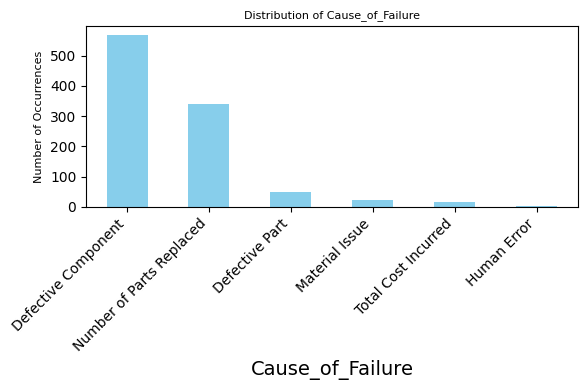

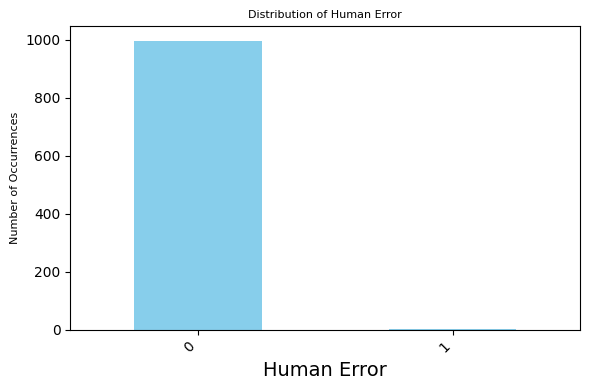

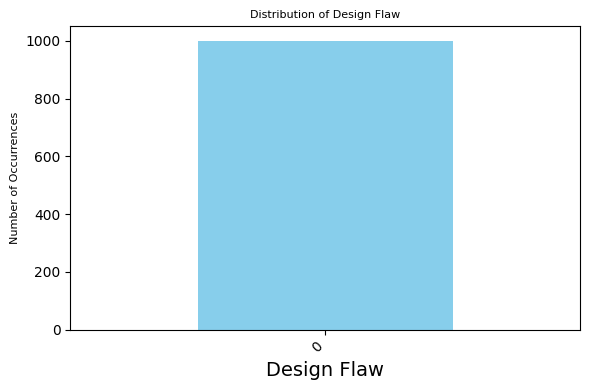

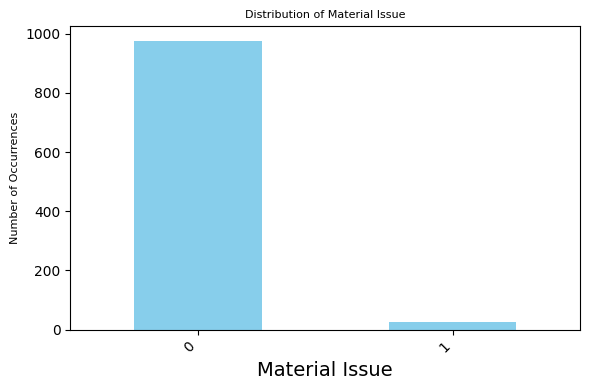

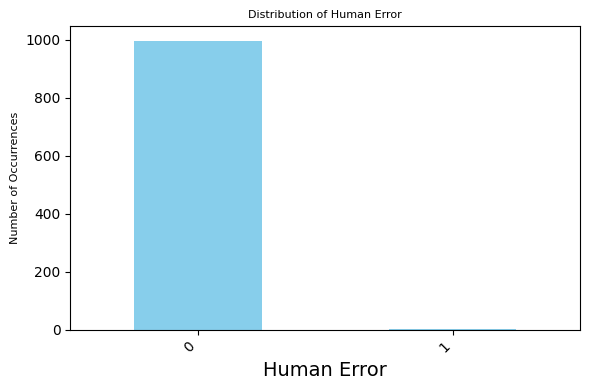

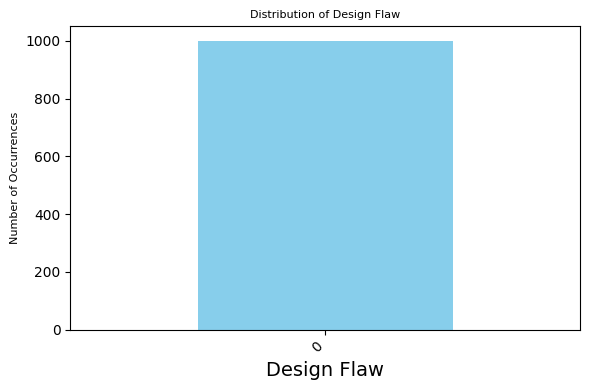

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'final_train4.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# List of columns to analyze
analyze = ['Cause_of_Failure', 'Human Error', 'Design Flaw','Material Issue',	
           'Human Error','Design Flaw'
]

# Loop through each column and plot its distribution
for column in analyze:
    plt.figure(figsize=(6, 4))
    # Count occurrences of each value in the column
    value_counts = df[column].value_counts()
    
    # Plot the distribution
    value_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {column}', fontsize=8)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Number of Occurrences', fontsize=8)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    # Show each plot
    plt.show()


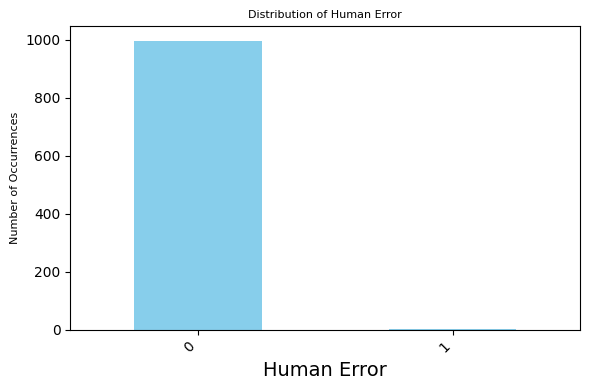

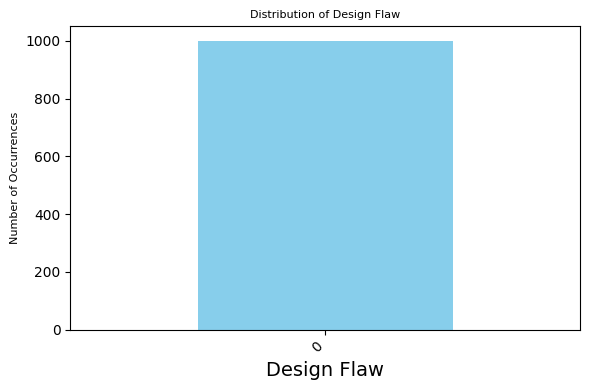

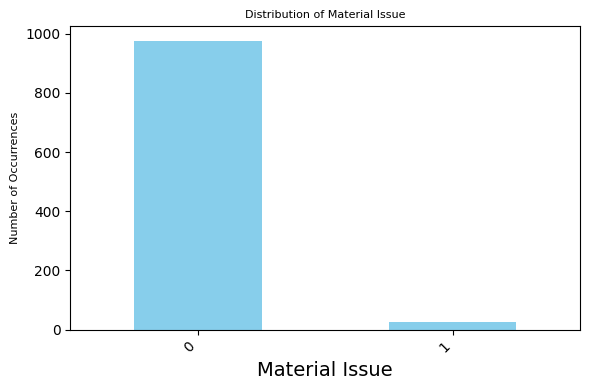

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'final_train4.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# List of columns to analyze
analyze = [
    'Human Error', 'Design Flaw','Material Issue'
]

# Loop through each column and plot its distribution
for column in analyze:
    plt.figure(figsize=(6, 4))
    # Count occurrences of each value in the column
    value_counts = df[column].value_counts()
    
    # Plot the distribution
    value_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {column}', fontsize=8)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Number of Occurrences', fontsize=8)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    # Show each plot
    plt.show()

